# Imports

Esta tabla contiene la información de los imports a nivel de fichero (módulo). --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('imports')

# Table name, features and target.
TABLE_NAME = 'imports'
TABLE_FEATURES = ['import__number_imports', 'import__module_imports_pct', 'import__average_imported_modules', 'import__from_imports_pct', 'import__average_from_imported_modules', 'import__average_as_in_imported_modules', 'import__local_imports_pct', 'import__expertise_level']
TABLE_TARGET = 'import__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-29 11:00:44.581775 Loading data ...
2024-05-29 11:00:44.777899 Data successfully load!!
2024-05-29 11:00:44.777899 Creating data cache files ...
2024-05-29 11:00:44.781086 Data cache files successfully created!!
Features shape: (18226, 8)
Target shape: (18226,)
As we can see the downloaded data contains a total of 18226 instances. Each of the instances corresponds to a program. For each program we have 8 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   import__number_imports                  18226 non-null  int64  
 1   import__module_imports_pct              18226 non-null  float64
 2   import__average_imported_modules        18226 non-null  float64
 3   import__from_imports_pct                18226 non-null  float64
 4   import__average_from_imported_modules   18226 non-null  float64
 5   import__average_as_in_imported_modules  18226 non-null  float64
 6   import__local_imports_pct               18226 non-null  float64
 7   import__expertise_level                 18226 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 18226 entries, 0 to 18225
Series name: import__expertise_level
Non-Null Count  Dtype 
-

Cómo podemos ver la tabla está compuesta por 7 variables numéricas y una de tipo objeto. 

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 39.09% instances for BEGINNER class and 60.91% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [82.19%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

import__number_imports                    0
import__module_imports_pct                0
import__average_imported_modules          0
import__from_imports_pct                  0
import__average_from_imported_modules     0
import__average_as_in_imported_modules    0
import__local_imports_pct                 0
import__expertise_level                   0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

import__number_imports
----------------------
0 instancias no tienen un valor para la columna import__number_imports


import__module_imports_pct
--------------------------
0 instancias no tienen un valor para la columna import__module_imports_pct


import__average_imported_modules
--------------------------------
0 instancias no tienen un valor para la columna import__average_imported_modules


import__from_imports_pct
------------------------
0 instancias no tienen un valor para la columna import__from_imports_pct


import__average_from_imported_modules
-------------------------------------
0 instancias no tienen un valor para la columna import__average_from_imported_modules


import__average_as_in_imported_modules
--------------------------------------
0 instancias no tienen un valor para la columna import__average_as_in_imported_modules


import__local_imports_pct
-------------------------
0 instancias no tienen un valor para la columna import__local_imports_pct


import__expertise

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
import__number_imports,18226.0,NaN,NaN,NaN,5.11511,6.357362,0.0,1.0,3.0,7.0,194.0
import__module_imports_pct,18226.0,NaN,NaN,NaN,0.294875,0.341658,0.0,0.0,0.166667,0.5,1.0
import__average_imported_modules,18226.0,NaN,NaN,NaN,0.58061,0.535705,0.0,0.0,1.0,1.0,8.5
import__from_imports_pct,18226.0,NaN,NaN,NaN,0.523187,0.397833,0.0,0.0,0.583333,1.0,1.0
import__average_from_imported_modules,18226.0,NaN,NaN,NaN,1.125814,1.077512,0.0,0.0,1.0,1.571428,23.0
import__average_as_in_imported_modules,18226.0,NaN,NaN,NaN,0.015271,0.083632,0.0,0.0,0.0,0.0,1.0
import__local_imports_pct,18226.0,NaN,NaN,NaN,0.596601,0.48646,0.0,0.0,1.0,1.0,1.0
import__expertise_level,18226,2,EXPERT,11102,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "import__number_imports": [(0, 0), (0, 3), (3, 7), (7, inf)],  # min: 0 max: 194 
    "import__module_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 8.5 
    "import__from_imports_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1), (1, 1)],  # min: 0.0 max: 1.0 
    "import__average_from_imported_modules": [(0.0, 0.0), (0.0, 2.0), (2.0, inf)],  # min: 0.0 max: 23.0 
    "import__average_as_in_imported_modules": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0 
    "import__local_imports_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0 
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['import__number_imports'], 10))
print(get_statistics(X_copy, ['import__module_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_imported_modules'], 10))
print(get_statistics(X_copy, ['import__from_imports_pct'], 10))
print(get_statistics(X_copy, ['import__average_from_imported_modules'], 10))
print(get_statistics(X_copy, ['import__average_as_in_imported_modules'], 10))
print(get_statistics(X_copy, ['import__local_imports_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
import__number_imports  count  percentage
               [7_inf]   5254   28.826951
                 [3_7)   5058   27.751564
                 [0_3)   4598   25.227697
                 [0_0]   3316   18.193789

import__module_imports_pct  count  percentage
                 [0.0_0.0]   7881   43.240426
                 [0.0_0.5)   5035   27.625370
                   [0.5_1)   3346   18.358389
                     [1_1]   1964   10.775815

import__average_imported_modules  count  percentage
                       [0.0_inf]  10345   56.759574
                       [0.0_0.0]   7881   43.240426

import__from_imports_pct  count  percentage
                 [0.5_1)   6248   34.280698
               [0.0_0.0]   5280   28.969604
                   [1_1]   4565   25.046637
               [0.0_0.5)   2133   11.703062

import__average_from_imported_modules  count  percentage
                            [0.0_2.0)   9895   54.290574
                            [0.0_0.0]   528

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (18226, 9)
Target shape: (18226,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

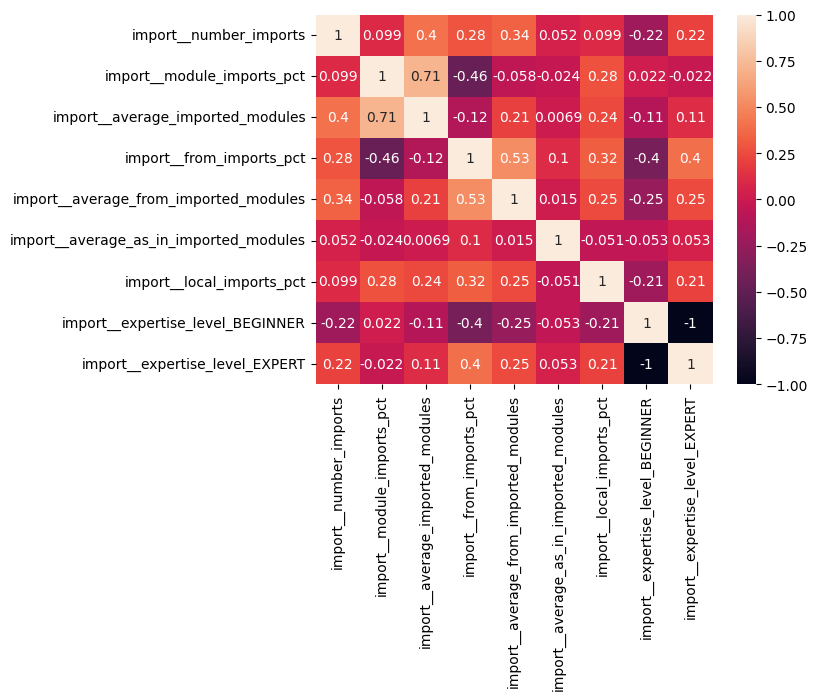

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 7 variable (3 porcentuales y 4 numericas y una categorica)

### Variable number_imports (1/7)
Esta variable es de tipo numérica y nos indica el número imports definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 194. Con una media de 5.11.

<Axes: ylabel='import__number_imports'>

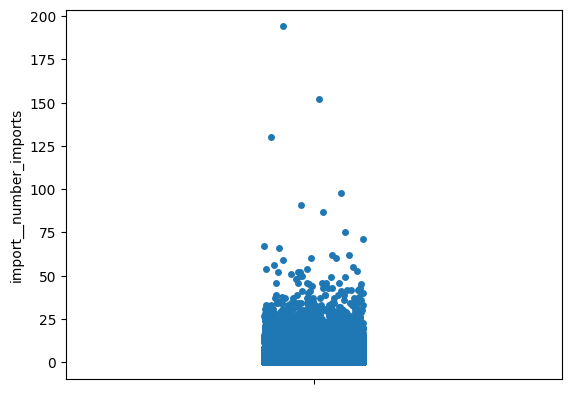

In [11]:
sns.stripplot(X['import__number_imports'])

### IMPORTANTE
Los tres valores máximos están muy alejados del siguiente.

In [12]:
print_outliers_for_df_column(X, 'import__number_imports')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6409028192773788
Rango valores atípicos extremos (Tukey): [-17.0,25.0]
Rango valores atípicos leves (Tukey): [-8.0,16.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.044896235172868226,123.84354929396459]
-3.0IQR: 0 instancias tienen un valor para import__number_imports inferior a -17.0 (Q1-3*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__number_imports inferior a -8.0 (Q1-1.5*IQR) para import__number_imports. Representando un 0.0% del total de instancias.
+1.5IQR: 833 instancias tienen un valor para import__number_imports superior a 16.0 (Q3+1.5*IQR) para import__number_imports. Representando un 4.57% del total de instancias.
+3.0IQR: 225 instancias tienen un valor para import__number_imports superior a 25.0 (Q3-3*IQR) para import__number_imports. Representando un 1.235% del total de instancias.
L: 3316 instancias tienen un valor para 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 123.8 (Con un MC de 64 usamos U)

In [13]:
X[X['import__number_imports'] > 123.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.0
mean,158.666672,0.109581,1.0,0.890419,1.0,0.038624,0.302564,0.0,1.0
std,32.516663,0.030094,0.0,0.030094,0.0,0.014545,0.524056,0.0,0.0
min,130.000000,0.092105,1.0,0.855670,1.0,0.025424,0.000000,0.0,1.0
25%,141.000000,0.092206,1.0,0.881681,1.0,0.030828,0.000000,0.0,1.0
50%,152.000000,0.092308,1.0,0.907692,1.0,0.036232,0.000000,0.0,1.0
75%,173.000000,0.118319,1.0,0.907794,1.0,0.045224,0.453846,0.0,1.0
max,194.000000,0.144330,1.0,0.907895,1.0,0.054217,0.907692,0.0,1.0


### IMPORTANTE
Hay 3 imports que tienen un número de imports muy elevado.

### Variable average_imported_modules (2/7)
Esta variable representa el número medio de alias importados en cada clausula import. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 8.5. Con una media de 0.58.

<Axes: ylabel='import__average_imported_modules'>

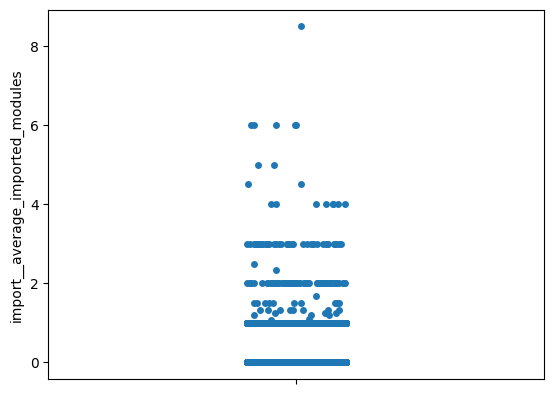

In [14]:
sns.stripplot(X['import__average_imported_modules'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente. 

In [15]:
print_outliers_for_df_column(X, 'import__average_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4070229355026694
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.3609141479839687,8.641216743503524]
-3.0IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -3.0 (Q1-3*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_imported_modules inferior a -1.5 (Q1-1.5*IQR) para import__average_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 60 instancias tienen un valor para import__average_imported_modules superior a 2.5 (Q3+1.5*IQR) para import__average_imported_modules. Representando un 0.3292% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para import__average_imported_modules superior a 4.0 (Q3-3*IQR) para import__average_imported_modules. Representando un 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4.0 (Con un MC de 40 usamos Tuckey Extremo)

In [16]:
X[X['import__average_imported_modules'] > 4.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.400000,0.572222,5.750000,0.427778,1.526191,0.011111,0.491667,0.600000,0.400000
std,2.796824,0.316228,1.160699,0.316228,1.631853,0.035136,0.452104,0.516398,0.516398
min,1.000000,0.222222,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.312500,5.000000,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.500000,6.000000,0.500000,1.000000,0.000000,0.583333,1.000000,0.000000
75%,3.500000,0.875000,6.000000,0.687500,2.196429,0.000000,0.937500,1.000000,1.000000
max,9.000000,1.000000,8.500000,0.777778,5.000000,0.111111,1.000000,1.000000,1.000000


### Variable average_from_imported_modules (3/7)
Esta variable representa el número medio de imports con la clausula From. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 23.0. Con una media de 1.12.

<Axes: ylabel='import__average_from_imported_modules'>

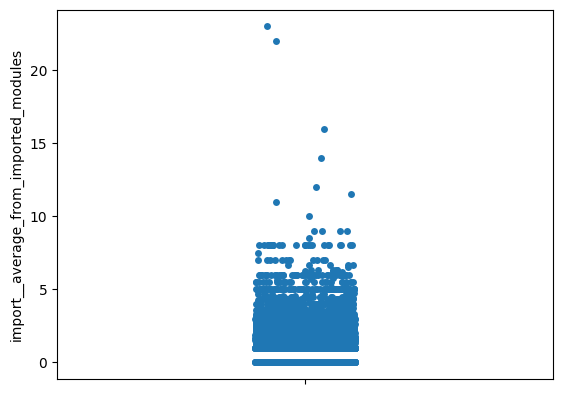

In [17]:
sns.stripplot(X['import__average_from_imported_modules'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente. 

In [18]:
print_outliers_for_df_column(X, 'import__average_from_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.90320432165338
Rango valores atípicos extremos (Tukey): [-4.714285612106323,6.285714149475098]
Rango valores atípicos leves (Tukey): [-2.3571428060531616,3.928571343421936]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09988208731010886,88.95152231949267]
-3.0IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -4.714285612106323 (Q1-3*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_from_imported_modules inferior a -2.3571428060531616 (Q1-1.5*IQR) para import__average_from_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 392 instancias tienen un valor para import__average_from_imported_modules superior a 3.928571343421936 (Q3+1.5*IQR) para import__average_from_imported_modules. Representando un 2.151% del total de instancias.
+3.0IQR: 62 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 6.28 (Con un MC de 90 usamos Tuckey Extremo)

In [19]:
X[X['import__average_from_imported_modules'] > 6.28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.370968,0.226344,0.419355,0.773656,8.473118,0.006048,0.875000,0.500000,0.500000
std,1.369861,0.299477,0.497482,0.299477,3.117054,0.047625,0.322484,0.504082,0.504082
min,1.000000,0.000000,0.000000,0.200000,6.333333,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.500000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,8.000000,0.000000,1.000000,0.500000,0.500000
75%,4.000000,0.500000,1.000000,1.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,5.000000,0.800000,1.000000,1.000000,23.000000,0.375000,1.000000,1.000000,1.000000


### Variable average_as_in_imported_modules (4/7)
Esta variable es de tipo numérica y nos indica el número medio de import con la cláusula as. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.015.

<Axes: ylabel='import__average_as_in_imported_modules'>

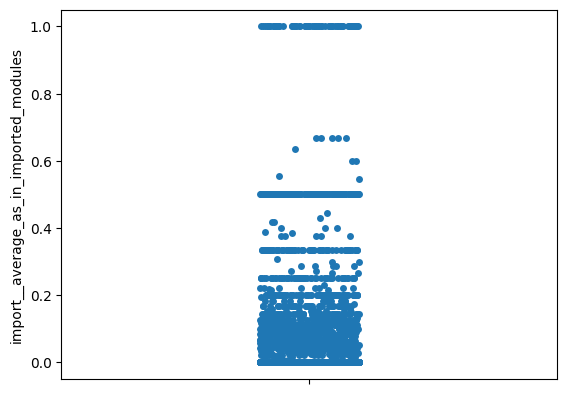

In [20]:
sns.stripplot(X['import__average_as_in_imported_modules'])

In [21]:
print_outliers_for_df_column(X, 'import__average_as_in_imported_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9010666984360518
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-3*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__average_as_in_imported_modules inferior a 0.0 (Q1-1.5*IQR) para import__average_as_in_imported_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 1205 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3+1.5*IQR) para import__average_as_in_imported_modules. Representando un 6.611% del total de instancias.
+3.0IQR: 1205 instancias tienen un valor para import__average_as_in_imported_modules superior a 0.0 (Q3-3*IQR) para import__average_as_in_imported_modules. 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Con un MC de 90 usamos Tuckey Extremo)

In [22]:
X[X['import__average_as_in_imported_modules'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,12.285478,0.253466,0.757261,0.746534,1.541974,0.230977,0.534176,0.302905,0.697095
std,12.776243,0.224109,0.501864,0.224109,0.919924,0.236663,0.485278,0.459705,0.459705
min,1.000000,0.000000,0.000000,0.071429,1.000000,0.007692,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.592593,1.000000,0.073171,0.000000,0.000000,0.000000
50%,10.000000,0.222222,1.000000,0.777778,1.200000,0.142857,0.907692,0.000000,1.000000
75%,15.000000,0.407407,1.000000,1.000000,1.695652,0.333333,1.000000,1.000000,1.000000
max,194.000000,0.928571,8.500000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000


### Variable module_imports_pct (5/7)
Esta variable representa la proporción de import simples del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.29.

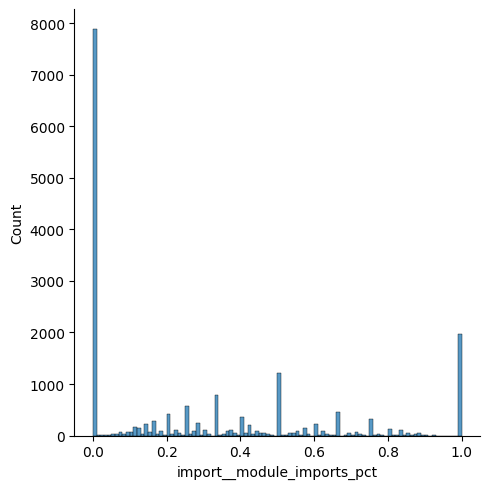

In [23]:
sns.displot(X['import__module_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [24]:
print_outliers_for_df_column(X, 'import__module_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.36346638202667236
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.21017507406897068,3.7097191967094023]
-3.0IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -1.5 (Q1-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__module_imports_pct inferior a -0.75 (Q1-1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 1.25 (Q3+1.5*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__module_imports_pct superior a 2.0 (Q3-3*IQR) para import__module_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias 

In [25]:
X[X['import__module_imports_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,1964.000000,1964.0,1964.000000,1964.0,1964.0,1964.0,1964.000000,1964.000000,1964.000000
mean,2.026986,1.0,1.042379,0.0,0.0,0.0,0.842422,0.613544,0.386456
std,1.500818,0.0,0.283828,0.0,0.0,0.0,0.362171,0.487061,0.487061
min,1.000000,1.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000
50%,1.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000
75%,3.000000,1.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000
max,14.000000,1.0,6.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


### IMPORTANTE
El 40% de los imports tienen module_imports_pct = 0.0

### Variable from_imports_pct (6/7)
Esta variable representa la proporción de imports que usan la clausula From en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.52.


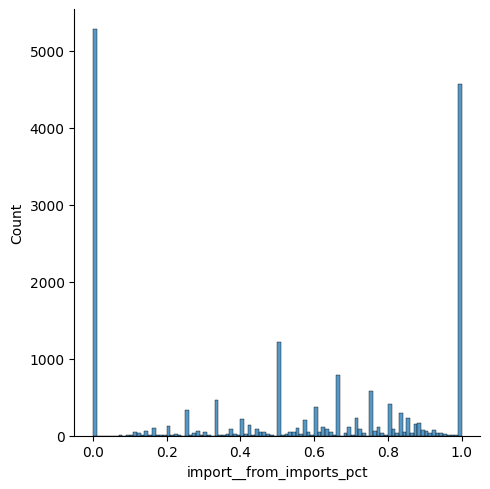

In [26]:
sns.displot(X['import__from_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [27]:
print_outliers_for_df_column(X, 'import__from_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.24188735228922378
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.6433022358966478,4.9472317769514]
-3.0IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -3.0 (Q1-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__from_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__from_imports_pct superior a 4.0 (Q3-3*IQR) para import__from_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para imp

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [28]:
X[(X['import__from_imports_pct'] > 0.0) & (X['import__from_imports_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000
mean,8.833910,0.406920,1.018371,0.593080,1.649877,0.019376,0.677662,0.261305,0.738695
std,7.180114,0.207390,0.215853,0.207390,0.897264,0.084646,0.459334,0.439372,0.439372
min,2.000000,0.016949,1.000000,0.058824,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.250000,1.000000,0.466667,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.400000,1.000000,0.600000,1.375000,0.000000,1.000000,0.000000,1.000000
75%,11.000000,0.533333,1.000000,0.750000,2.000000,0.000000,1.000000,1.000000,1.000000
max,194.000000,0.941176,8.500000,0.983051,11.500000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 28% tienen un 0% y el 25% tienen un 100%.

### Variable local_imports_pct (7/7)
Esta variable representa la proporción de imports no escritos al comienzo del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 1.0. Con una media de 0.59. 

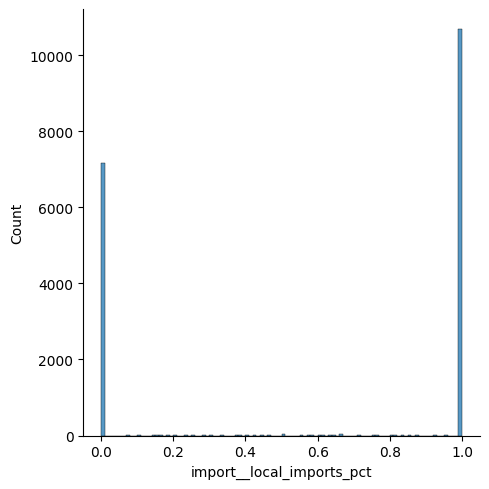

In [29]:
sns.displot(X['import__local_imports_pct'], bins=[i / 100 for i in range(0, 101)])

In [30]:
print_outliers_for_df_column(X, 'import__local_imports_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.2144732938615367
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-3.5372807546136995,1.7080847986137384]
-3.0IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -3.0 (Q1-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para import__local_imports_pct inferior a -1.5 (Q1-1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 2.5 (Q3+1.5*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para import__local_imports_pct superior a 4.0 (Q3-3*IQR) para import__local_imports_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un val

IMPORTANTE: Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [31]:
X[(X['import__local_imports_pct'] < 1.0) & X['import__local_imports_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level_BEGINNER,import__expertise_level_EXPERT
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,9.965425,0.445745,0.941356,0.554255,1.736395,0.040344,0.528308,0.351064,0.648936
std,9.775418,0.279731,0.604559,0.279731,1.140415,0.119085,0.231531,0.477939,0.477939
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000
25%,5.000000,0.222222,1.000000,0.333333,1.000000,0.000000,0.333333,0.000000,0.000000
50%,7.000000,0.466667,1.000000,0.533333,1.500000,0.000000,0.541958,0.000000,1.000000
75%,12.000000,0.666667,1.000000,0.777778,2.000000,0.000000,0.688702,1.000000,1.000000
max,130.000000,1.000000,8.500000,1.000000,8.000000,1.000000,0.984848,1.000000,1.000000


## Multivariate

TODO: isolation forest algorithm

In [32]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,import__number_imports,import__module_imports_pct,import__average_imported_modules,import__from_imports_pct,import__average_from_imported_modules,import__average_as_in_imported_modules,import__local_imports_pct,import__expertise_level
293,1,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,BEGINNER
383,20,0.800000,1.0,0.200000,6.000000,0.041667,0.750000,BEGINNER
2044,4,0.250000,3.0,0.750000,1.000000,0.666667,0.000000,BEGINNER
2085,4,0.250000,3.0,0.750000,1.000000,0.666667,0.000000,BEGINNER
2156,4,0.250000,3.0,0.750000,1.000000,0.666667,0.000000,BEGINNER
4125,1,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,BEGINNER
4224,20,0.800000,1.0,0.200000,6.000000,0.041667,0.750000,BEGINNER
4677,1,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,BEGINNER
4776,20,0.800000,1.0,0.200000,6.000000,0.041667,0.750000,BEGINNER
5382,1,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,BEGINNER


### IMPORTANTE
Revisar las 17 identificadas como outliers.